In [8]:
import random

import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms
from tqdm import tqdm

from gene.optimisers.annealing import AnnealingOptimiser
import torch

from gene.targets import get_negative_accuracy_target
from gene.util import get_accuracy, grid_search


random.seed(0)
torch.manual_seed(0)
np.random.seed(0)

DEVICE = ["cpu", "cuda"][1]
N_EPOCHS = 5


def train(decay=0.999, init_std=5):
    # Define the model
    model = torch.nn.Sequential(
        torch.nn.Flatten(),
        torch.nn.Linear(28*28, 256),
        torch.nn.ReLU(),
        torch.nn.Linear(256, 64),
        torch.nn.ReLU(),
        torch.nn.Linear(64, 10)
    )
    models = [model.to(DEVICE)]

    # Define the optimiser
    optimiser = AnnealingOptimiser(target_func=get_negative_accuracy_target,
                                   init_std=init_std,
                                   std_updater=lambda std: std*decay if std >= 0.0001 else std,
                                   selection_limit=10,
                                   device=DEVICE)

    # Define the data
    train_data = datasets.MNIST(
            root="./cache",
            download=True,
            train=True,
            transform=transforms.ToTensor()
    )
    train_loader = DataLoader(train_data, batch_size=1024, shuffle=True)
    test_data = datasets.MNIST(
            root="./cache",
            download=True,
            train=False,
            transform=transforms.ToTensor()
        )
    test_loader = DataLoader(test_data, batch_size=1024)

    for e in tqdm(range(N_EPOCHS)):
        for images, labels in train_loader:
            models = optimiser.step(models, images.to(DEVICE), labels.to(DEVICE))

    return np.mean([get_accuracy(test_loader, m, DEVICE) for m in models])


parameters = {"decay": np.logspace(0, np.log10(0.9654), 10),
              "init_std": np.logspace(np.log10(0.01), np.log10(20), 10)}
n_param_0, n_param_1 = len(list(parameters.values())[0]), len(list(parameters.values())[1])
results = grid_search(trainer=train, parameters=parameters)
print(results)

  0%|          | 0/100 [00:00<?, ?it/s]

{'decay': 1.0, 'init_std': 0.01}



  1%|          | 1/100 [00:38<1:04:02, 38.81s/it]

{'decay': 1.0, 'init_std': 0.02326918168776363}



  2%|▏         | 2/100 [01:16<1:02:39, 38.36s/it]

{'decay': 1.0, 'init_std': 0.05414548164181543}



  3%|▎         | 3/100 [01:54<1:01:33, 38.07s/it]

{'decay': 1.0, 'init_std': 0.12599210498948735}



  4%|▍         | 4/100 [02:32<1:00:56, 38.09s/it]

{'decay': 1.0, 'init_std': 0.29317331822241716}



  5%|▌         | 5/100 [03:10<1:00:17, 38.08s/it]

{'decay': 1.0, 'init_std': 0.6821903207721969}



  6%|▌         | 6/100 [03:48<59:42, 38.11s/it]  

{'decay': 1.0, 'init_std': 1.5874010519682002}



  7%|▋         | 7/100 [04:26<58:52, 37.99s/it]

{'decay': 1.0, 'init_std': 3.6937523489595185}



  8%|▊         | 8/100 [05:04<58:03, 37.87s/it]

{'decay': 1.0, 'init_std': 8.595059451754269}



  9%|▉         | 9/100 [05:40<56:40, 37.37s/it]

{'decay': 1.0, 'init_std': 20.000000000000004}



 10%|█         | 10/100 [06:17<55:49, 37.22s/it]

{'decay': 0.9960951155496743, 'init_std': 0.01}



 11%|█         | 11/100 [06:55<55:36, 37.49s/it]

{'decay': 0.9960951155496743, 'init_std': 0.02326918168776363}



 12%|█▏        | 12/100 [07:33<55:07, 37.58s/it]

{'decay': 0.9960951155496743, 'init_std': 0.05414548164181543}



 13%|█▎        | 13/100 [08:13<55:30, 38.28s/it]

{'decay': 0.9960951155496743, 'init_std': 0.12599210498948735}



 14%|█▍        | 14/100 [08:51<54:48, 38.24s/it]

{'decay': 0.9960951155496743, 'init_std': 0.29317331822241716}



 15%|█▌        | 15/100 [09:29<54:06, 38.20s/it]

{'decay': 0.9960951155496743, 'init_std': 0.6821903207721969}



 16%|█▌        | 16/100 [10:08<53:52, 38.48s/it]

{'decay': 0.9960951155496743, 'init_std': 1.5874010519682002}



 17%|█▋        | 17/100 [10:46<53:00, 38.32s/it]

{'decay': 0.9960951155496743, 'init_std': 3.6937523489595185}



 18%|█▊        | 18/100 [11:24<52:17, 38.26s/it]

{'decay': 0.9960951155496743, 'init_std': 8.595059451754269}



 19%|█▉        | 19/100 [12:01<50:55, 37.72s/it]

{'decay': 0.9960951155496743, 'init_std': 20.000000000000004}



 20%|██        | 20/100 [12:37<49:48, 37.35s/it]

{'decay': 0.992205479221919, 'init_std': 0.01}



 21%|██        | 21/100 [13:14<49:04, 37.28s/it]

{'decay': 0.992205479221919, 'init_std': 0.02326918168776363}



 22%|██▏       | 22/100 [13:51<48:27, 37.27s/it]

{'decay': 0.992205479221919, 'init_std': 0.05414548164181543}



 23%|██▎       | 23/100 [14:29<47:51, 37.29s/it]

{'decay': 0.992205479221919, 'init_std': 0.12599210498948735}



 24%|██▍       | 24/100 [15:06<47:13, 37.29s/it]

{'decay': 0.992205479221919, 'init_std': 0.29317331822241716}



 25%|██▌       | 25/100 [15:44<46:56, 37.55s/it]

{'decay': 0.992205479221919, 'init_std': 0.6821903207721969}



 26%|██▌       | 26/100 [16:25<47:26, 38.47s/it]

{'decay': 0.992205479221919, 'init_std': 1.5874010519682002}



 27%|██▋       | 27/100 [17:05<47:14, 38.83s/it]

{'decay': 0.992205479221919, 'init_std': 3.6937523489595185}



 28%|██▊       | 28/100 [17:44<46:47, 38.99s/it]

{'decay': 0.992205479221919, 'init_std': 8.595059451754269}



 29%|██▉       | 29/100 [18:23<46:09, 39.01s/it]

{'decay': 0.992205479221919, 'init_std': 20.000000000000004}



 30%|███       | 30/100 [19:02<45:35, 39.09s/it]

{'decay': 0.9883310314745773, 'init_std': 0.01}



 31%|███       | 31/100 [19:41<44:52, 39.02s/it]

{'decay': 0.9883310314745773, 'init_std': 0.02326918168776363}



 32%|███▏      | 32/100 [20:21<44:24, 39.18s/it]

{'decay': 0.9883310314745773, 'init_std': 0.05414548164181543}



 33%|███▎      | 33/100 [21:00<43:44, 39.17s/it]

{'decay': 0.9883310314745773, 'init_std': 0.12599210498948735}



 34%|███▍      | 34/100 [21:38<42:37, 38.75s/it]

{'decay': 0.9883310314745773, 'init_std': 0.29317331822241716}



 35%|███▌      | 35/100 [22:16<41:45, 38.54s/it]

{'decay': 0.9883310314745773, 'init_std': 0.6821903207721969}



 36%|███▌      | 36/100 [22:54<41:12, 38.63s/it]

{'decay': 0.9883310314745773, 'init_std': 1.5874010519682002}



 37%|███▋      | 37/100 [23:33<40:38, 38.71s/it]

{'decay': 0.9883310314745773, 'init_std': 3.6937523489595185}



 38%|███▊      | 38/100 [24:13<40:08, 38.85s/it]

{'decay': 0.9883310314745773, 'init_std': 8.595059451754269}



 39%|███▉      | 39/100 [24:52<39:35, 38.94s/it]

{'decay': 0.9883310314745773, 'init_std': 20.000000000000004}



 40%|████      | 40/100 [25:32<39:26, 39.45s/it]

{'decay': 0.984471712997998, 'init_std': 0.01}



 41%|████      | 41/100 [26:13<39:09, 39.82s/it]

{'decay': 0.984471712997998, 'init_std': 0.02326918168776363}



 42%|████▏     | 42/100 [26:53<38:28, 39.80s/it]

{'decay': 0.984471712997998, 'init_std': 0.05414548164181543}



 43%|████▎     | 43/100 [27:32<37:44, 39.72s/it]

{'decay': 0.984471712997998, 'init_std': 0.12599210498948735}



 44%|████▍     | 44/100 [28:13<37:16, 39.94s/it]

{'decay': 0.984471712997998, 'init_std': 0.29317331822241716}



 45%|████▌     | 45/100 [28:55<37:20, 40.74s/it]

{'decay': 0.984471712997998, 'init_std': 0.6821903207721969}



 46%|████▌     | 46/100 [29:37<37:01, 41.13s/it]

{'decay': 0.984471712997998, 'init_std': 1.5874010519682002}



 47%|████▋     | 47/100 [30:19<36:24, 41.22s/it]

{'decay': 0.984471712997998, 'init_std': 3.6937523489595185}



 48%|████▊     | 48/100 [30:59<35:24, 40.85s/it]

{'decay': 0.984471712997998, 'init_std': 8.595059451754269}



 49%|████▉     | 49/100 [31:40<34:41, 40.80s/it]

{'decay': 0.984471712997998, 'init_std': 20.000000000000004}



 50%|█████     | 50/100 [32:19<33:40, 40.40s/it]

{'decay': 0.9806274647141267, 'init_std': 0.01}



 51%|█████     | 51/100 [32:57<32:29, 39.78s/it]

{'decay': 0.9806274647141267, 'init_std': 0.02326918168776363}



 52%|█████▏    | 52/100 [33:37<31:45, 39.71s/it]

{'decay': 0.9806274647141267, 'init_std': 0.05414548164181543}



 53%|█████▎    | 53/100 [34:17<31:10, 39.80s/it]

{'decay': 0.9806274647141267, 'init_std': 0.12599210498948735}



 54%|█████▍    | 54/100 [34:54<30:00, 39.13s/it]

{'decay': 0.9806274647141267, 'init_std': 0.29317331822241716}



 55%|█████▌    | 55/100 [35:34<29:31, 39.36s/it]

{'decay': 0.9806274647141267, 'init_std': 0.6821903207721969}



 56%|█████▌    | 56/100 [36:14<28:52, 39.37s/it]

{'decay': 0.9806274647141267, 'init_std': 1.5874010519682002}



 57%|█████▋    | 57/100 [36:53<28:10, 39.31s/it]

{'decay': 0.9806274647141267, 'init_std': 3.6937523489595185}



 58%|█████▊    | 58/100 [37:34<27:47, 39.71s/it]

{'decay': 0.9806274647141267, 'init_std': 8.595059451754269}



 59%|█████▉    | 59/100 [38:14<27:11, 39.79s/it]

{'decay': 0.9806274647141267, 'init_std': 20.000000000000004}



 60%|██████    | 60/100 [38:53<26:29, 39.75s/it]

{'decay': 0.9767982277756021, 'init_std': 0.01}



 61%|██████    | 61/100 [39:34<25:57, 39.93s/it]

{'decay': 0.9767982277756021, 'init_std': 0.02326918168776363}



 62%|██████▏   | 62/100 [40:13<25:13, 39.82s/it]

{'decay': 0.9767982277756021, 'init_std': 0.05414548164181543}



 63%|██████▎   | 63/100 [40:51<24:15, 39.33s/it]

{'decay': 0.9767982277756021, 'init_std': 0.12599210498948735}



 64%|██████▍   | 64/100 [41:29<23:21, 38.94s/it]

{'decay': 0.9767982277756021, 'init_std': 0.29317331822241716}



 65%|██████▌   | 65/100 [42:07<22:33, 38.68s/it]

{'decay': 0.9767982277756021, 'init_std': 0.6821903207721969}



 66%|██████▌   | 66/100 [42:47<22:00, 38.85s/it]

{'decay': 0.9767982277756021, 'init_std': 1.5874010519682002}



 67%|██████▋   | 67/100 [43:27<21:36, 39.29s/it]

{'decay': 0.9767982277756021, 'init_std': 3.6937523489595185}



 68%|██████▊   | 68/100 [44:06<20:56, 39.26s/it]

{'decay': 0.9767982277756021, 'init_std': 8.595059451754269}



 69%|██████▉   | 69/100 [44:45<20:17, 39.27s/it]

{'decay': 0.9767982277756021, 'init_std': 20.000000000000004}



 70%|███████   | 70/100 [45:25<19:40, 39.34s/it]

{'decay': 0.9729839435648555, 'init_std': 0.01}



 71%|███████   | 71/100 [46:04<19:01, 39.36s/it]

{'decay': 0.9729839435648555, 'init_std': 0.02326918168776363}



 72%|███████▏  | 72/100 [46:43<18:19, 39.26s/it]

{'decay': 0.9729839435648555, 'init_std': 0.05414548164181543}



 73%|███████▎  | 73/100 [47:22<17:37, 39.18s/it]

{'decay': 0.9729839435648555, 'init_std': 0.12599210498948735}



 74%|███████▍  | 74/100 [48:01<16:53, 38.99s/it]

{'decay': 0.9729839435648555, 'init_std': 0.29317331822241716}



 75%|███████▌  | 75/100 [48:39<16:10, 38.81s/it]

{'decay': 0.9729839435648555, 'init_std': 0.6821903207721969}



 76%|███████▌  | 76/100 [49:18<15:30, 38.77s/it]

{'decay': 0.9729839435648555, 'init_std': 1.5874010519682002}



 77%|███████▋  | 77/100 [49:57<14:56, 38.99s/it]

{'decay': 0.9729839435648555, 'init_std': 3.6937523489595185}



 78%|███████▊  | 78/100 [50:36<14:12, 38.76s/it]

{'decay': 0.9729839435648555, 'init_std': 8.595059451754269}



 79%|███████▉  | 79/100 [51:13<13:24, 38.30s/it]

{'decay': 0.9729839435648555, 'init_std': 20.000000000000004}



 80%|████████  | 80/100 [51:50<12:39, 37.96s/it]

{'decay': 0.9691845536932125, 'init_std': 0.01}



 81%|████████  | 81/100 [52:26<11:50, 37.40s/it]

{'decay': 0.9691845536932125, 'init_std': 0.02326918168776363}



 82%|████████▏ | 82/100 [53:03<11:09, 37.21s/it]

{'decay': 0.9691845536932125, 'init_std': 0.05414548164181543}



 83%|████████▎ | 83/100 [53:39<10:27, 36.93s/it]

{'decay': 0.9691845536932125, 'init_std': 0.12599210498948735}



 84%|████████▍ | 84/100 [54:16<09:49, 36.87s/it]

{'decay': 0.9691845536932125, 'init_std': 0.29317331822241716}



 85%|████████▌ | 85/100 [54:53<09:12, 36.82s/it]

{'decay': 0.9691845536932125, 'init_std': 0.6821903207721969}



 86%|████████▌ | 86/100 [55:29<08:34, 36.74s/it]

{'decay': 0.9691845536932125, 'init_std': 1.5874010519682002}



 87%|████████▋ | 87/100 [56:05<07:55, 36.59s/it]

{'decay': 0.9691845536932125, 'init_std': 3.6937523489595185}



 88%|████████▊ | 88/100 [56:42<07:17, 36.45s/it]

{'decay': 0.9691845536932125, 'init_std': 8.595059451754269}



 89%|████████▉ | 89/100 [57:18<06:40, 36.37s/it]

{'decay': 0.9691845536932125, 'init_std': 20.000000000000004}



 90%|█████████ | 90/100 [57:54<06:02, 36.28s/it]

{'decay': 0.9654, 'init_std': 0.01}



 91%|█████████ | 91/100 [58:30<05:27, 36.40s/it]

{'decay': 0.9654, 'init_std': 0.02326918168776363}



 92%|█████████▏| 92/100 [59:07<04:52, 36.51s/it]

{'decay': 0.9654, 'init_std': 0.05414548164181543}



 93%|█████████▎| 93/100 [59:44<04:16, 36.69s/it]

{'decay': 0.9654, 'init_std': 0.12599210498948735}



 94%|█████████▍| 94/100 [1:00:21<03:40, 36.81s/it]

{'decay': 0.9654, 'init_std': 0.29317331822241716}



 95%|█████████▌| 95/100 [1:00:59<03:04, 36.88s/it]

{'decay': 0.9654, 'init_std': 0.6821903207721969}



 96%|█████████▌| 96/100 [1:01:36<02:27, 36.96s/it]

{'decay': 0.9654, 'init_std': 1.5874010519682002}



 97%|█████████▋| 97/100 [1:02:12<01:50, 36.83s/it]

{'decay': 0.9654, 'init_std': 3.6937523489595185}



 98%|█████████▊| 98/100 [1:02:49<01:13, 36.82s/it]

{'decay': 0.9654, 'init_std': 8.595059451754269}



 99%|█████████▉| 99/100 [1:03:26<00:36, 36.88s/it]

{'decay': 0.9654, 'init_std': 20.000000000000004}



100%|██████████| 100/100 [1:04:02<00:00, 38.43s/it]

[Result(decay=1.0, init_std=0.01, score=0.45438999999999996), Result(decay=1.0, init_std=0.02326918168776363, score=0.51776), Result(decay=1.0, init_std=0.05414548164181543, score=0.44482), Result(decay=1.0, init_std=0.12599210498948735, score=0.5259400000000001), Result(decay=1.0, init_std=0.29317331822241716, score=0.49363999999999997), Result(decay=1.0, init_std=0.6821903207721969, score=0.46475999999999995), Result(decay=1.0, init_std=1.5874010519682002, score=0.41839000000000004), Result(decay=1.0, init_std=3.6937523489595185, score=0.43289), Result(decay=1.0, init_std=8.595059451754269, score=0.51446), Result(decay=1.0, init_std=20.000000000000004, score=0.4677300000000001), Result(decay=0.9960951155496743, init_std=0.01, score=0.53882), Result(decay=0.9960951155496743, init_std=0.02326918168776363, score=0.53392), Result(decay=0.9960951155496743, init_std=0.05414548164181543, score=0.50287), Result(decay=0.9960951155496743, init_std=0.12599210498948735, score=0.5669600000000001)

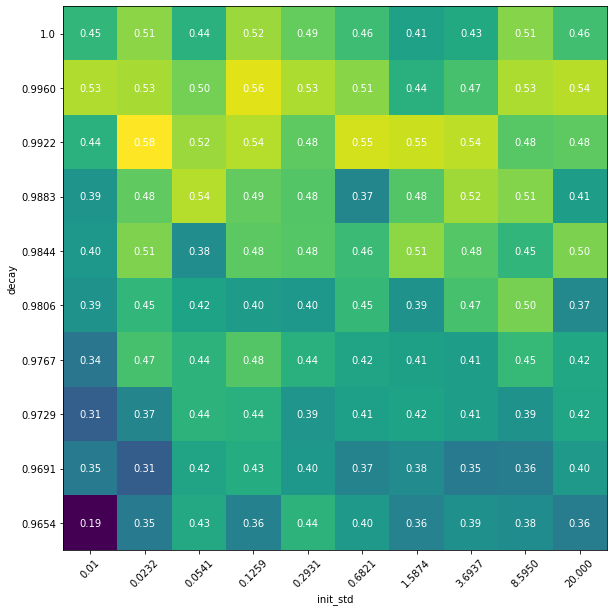

In [9]:
scores = [result.score for result in results]
scores = np.reshape(scores, (n_param_0, n_param_1))

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(scores)

for i in range(n_param_0):
    for j in range(n_param_1):
        text = ax.text(j, i, str(scores[i, j])[:4],
                       ha="center", va="center", color="w")
ax.set_xticks(range(n_param_1))
ax.set_xticklabels([str(val)[:6] for val in list(parameters.values())[1]])
ax.set_yticks(range(n_param_0))
ax.set_yticklabels([str(val)[:6] for val in list(parameters.values())[0]])
ax.set_xlabel(list(parameters.keys())[1])
ax.set_ylabel(list(parameters.keys())[0])
plt.xticks(rotation=45)

plt.show()